<a href="https://colab.research.google.com/github/yangjunmo37/-2-Deeplearning_with_tensorflow/blob/2%EC%9E%A5/2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

데이터 호출

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('/content/gdrive/MyDrive/딥러닝 텐서플로 교과서/chap2/data/car_evaluation.csv', names=cols, header=None)

예제 데이터셋 분포

<Axes: ylabel='output'>

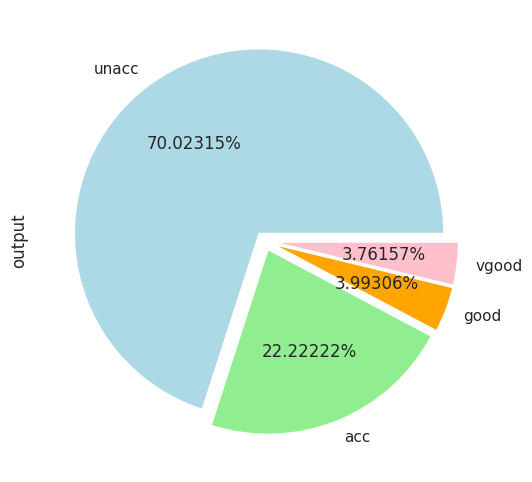

In [4]:
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                explode=(0.05, 0.05, 0.05, 0.05))

원-핫 인코딩 적용

In [17]:
price = pd.get_dummies(cars.price)
maint = pd.get_dummies(cars.maint, prefix='maint')
doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values

In [18]:
pd.DataFrame(price)

,high,low,med,vhigh
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1723,0,1,0,0
1724,0,1,0,0
1725,0,1,0,0
1726,0,1,0,0


In [19]:
price = pd.get_dummies(cars.price, prefix='price')
price

,price_high,price_low,price_med,price_vhigh
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1723,0,1,0,0
1724,0,1,0,0
1725,0,1,0,0
1726,0,1,0,0


In [20]:
pd.DataFrame(X)

,high,low,med,vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


훈련과 테스트 데이터셋으로 분리

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

모델 생성 및 컴파일

In [22]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [24]:
X.shape[1]

21

In [23]:
input_layer = Input(shape=(X.shape[1],))

In [25]:
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

In [26]:
model = Model(inputs=input_layer, outputs=output)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


모델 훈련

In [30]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=0, validation_split=0.2)

모델 평가

In [31]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test Accuracy:', score[1])

11/11 [==============================] - 0s 4ms/step - loss: 0.0734 - acc: 0.9798
Test score: 0.0733853355050087
Test Accuracy: 0.9797688126564026
